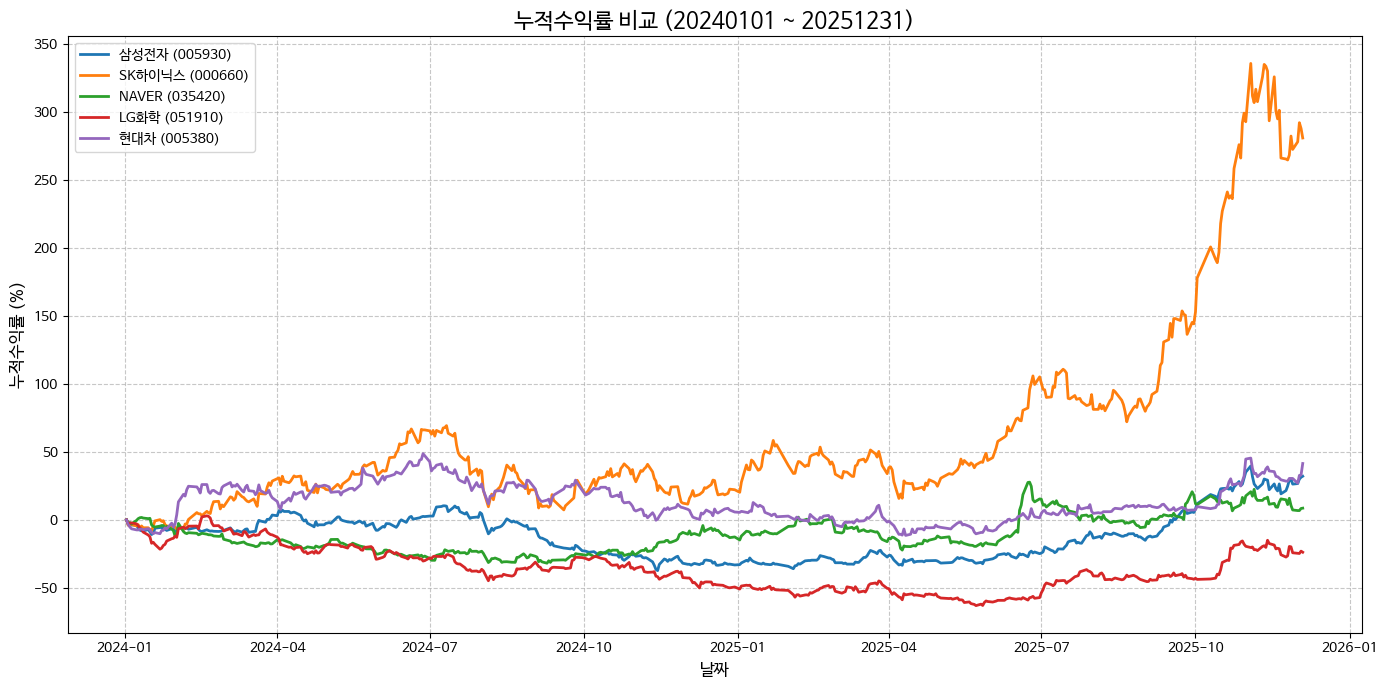

In [23]:
from pykrx import stock
import pandas as pd
import matplotlib.pyplot as plt

start_date = "20240101"
end_date = "20251231"
#tickers = ["005930", "000660", "035420", "051910", "005380", "068270", "207940", "105560", "012330", "096770"]
tickers = ["005930", "000660", "035420", "051910", "005380"]

plt.figure(figsize=(14, 7))

for ticker in tickers:
    name = stock.get_market_ticker_name(ticker)
    df = stock.get_market_ohlcv(start_date, end_date, ticker)
    dpc = (df['종가'] - df['종가'].shift(1)) / df['종가'].shift(1) * 100 #dpc: daily percent change
    dpc.iloc[0] = 0
    cp = ((100 + dpc) / 100).cumprod() * 100 - 100 # 일간 변동률 누적곱 계산
    plt.plot(cp, linewidth=2, label=f"{name} ({ticker})")

plt.title(f"누적수익률 비교 ({start_date} ~ {end_date})", fontsize=16)
plt.xlabel("날짜", fontsize=12)
plt.ylabel("누적수익률 (%)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend()

plt.tight_layout()
plt.show()


In [3]:
from pykrx import stock
from pykrx import bond

df = bond.get_otc_treasury_yields("20251201")
print(df)

                     수익률     대비
채권종류                           
국고채 1년             2.544  0.027
국고채 2년             2.891  0.056
국고채 3년             3.045  0.054
국고채 5년             3.233  0.057
국고채 10년            3.387  0.043
국고채 20년            3.352  0.039
국고채 30년            3.253  0.033
국민주택 1종 5년         3.365  0.054
회사채 AA-(무보증 3년)    3.481  0.053
회사채 BBB- (무보증 3년)  9.328  0.050
CD(91일)            2.800  0.000


In [4]:
df = bond.get_otc_treasury_yields("20251101", "20251201", "국고채2년")
print(df.head())

              수익률     대비
일자                      
2025-11-03  2.678  0.042
2025-11-04  2.669 -0.009
2025-11-05  2.693  0.024
2025-11-06  2.752  0.059
2025-11-07  2.803  0.051


In [10]:
etf_ticker = "152100" 
etf_name = stock.get_etf_ticker_name(etf_ticker)
print(etf_name)

PLUS 200


In [20]:
df = stock.get_etf_ohlcv_by_date("20251101", "20251201", "152100")
print(df.head())

                 NAV     시가     고가     저가     종가      거래량          거래대금  \
날짜                                                                        
2025-11-03  61077.62  59260  60955  59180  60940   717749   43425148180   
2025-11-04  59343.95  60940  60985  59265  59265   610576   36686436264   
2025-11-05  57653.41  58275  58315  55470  57660  1824928  104106524154   
2025-11-06  57959.84  59040  59205  57275  57995   655200   38121218105   
2025-11-07  56902.42  56940  58105  55940  56915   946643   53952228600   

              기초지수  
날짜                  
2025-11-03  599.03  
2025-11-04  581.94  
2025-11-05  565.40  
2025-11-06  568.38  
2025-11-07  557.98  


In [7]:
df = stock.get_etf_price_change_by_ticker("20251101", "20251201")
print(df.head())

            시가      종가  변동폭   등락률      거래량          거래대금
티커                                                      
491610  103245  102710 -535 -0.52   146816   15124193494
451060   18895   18105 -790 -4.18  1983535   36892692412
0103T0   10655    9855 -800 -7.51  6631738   67933344751
463290  108605  108765  160  0.15   197662   21478962992
479080   52850   52485 -365 -0.69  2465640  129790164261


In [12]:
df = stock.get_etf_ohlcv_by_ticker("20251201")
print(df.head())

              NAV      시가      고가      저가      종가     거래량        거래대금  \
티커                                                                      
491610  102704.71  102710  102715  102710  102710    5281   542424785   
451060   18086.74   18340   18360   17935   18105   35035   633843390   
0103T0    9864.01    9880    9945    9805    9855  217488  2149003854   
463290  108753.00  108755  108770  108755  108765    2636   286695810   
0131W0  100060.69  100065  100065  100065  100065   20003  2001600195   

            기초지수  
티커                
491610  11622.96  
451060    553.96  
0103T0   1950.13  
463290  14445.39  
0131W0    114.83  


In [24]:
df_sorted = df.sort_values(by="시가", ascending=False)
print(df_sorted.head())

                  NAV      시가      고가      저가      종가     거래량         거래대금  \
날짜                                                                           
2025-12-05  166729.84  167310  167800  167150  167300  313377  52466731487   
2025-12-04  167334.70  166475  167350  166360  167340  356685  59560515273   
2025-12-03  166374.18  166470  167115  166165  166700  365289  60926889983   
2025-11-13  166029.84  166005  167320  165985  166875  439004  73156664872   
2025-11-12  165913.01  165700  166900  165415  166710  416126  69275512629   

                기초지수  
날짜                    
2025-12-05  25581.70  
2025-12-04  25581.70  
2025-12-03  25606.55  
2025-11-13  24993.46  
2025-11-12  25517.33  


In [18]:
etf_ticker = "133690" 
etf_name = stock.get_etf_ticker_name(etf_ticker)
print(etf_name)

TIGER 미국나스닥100


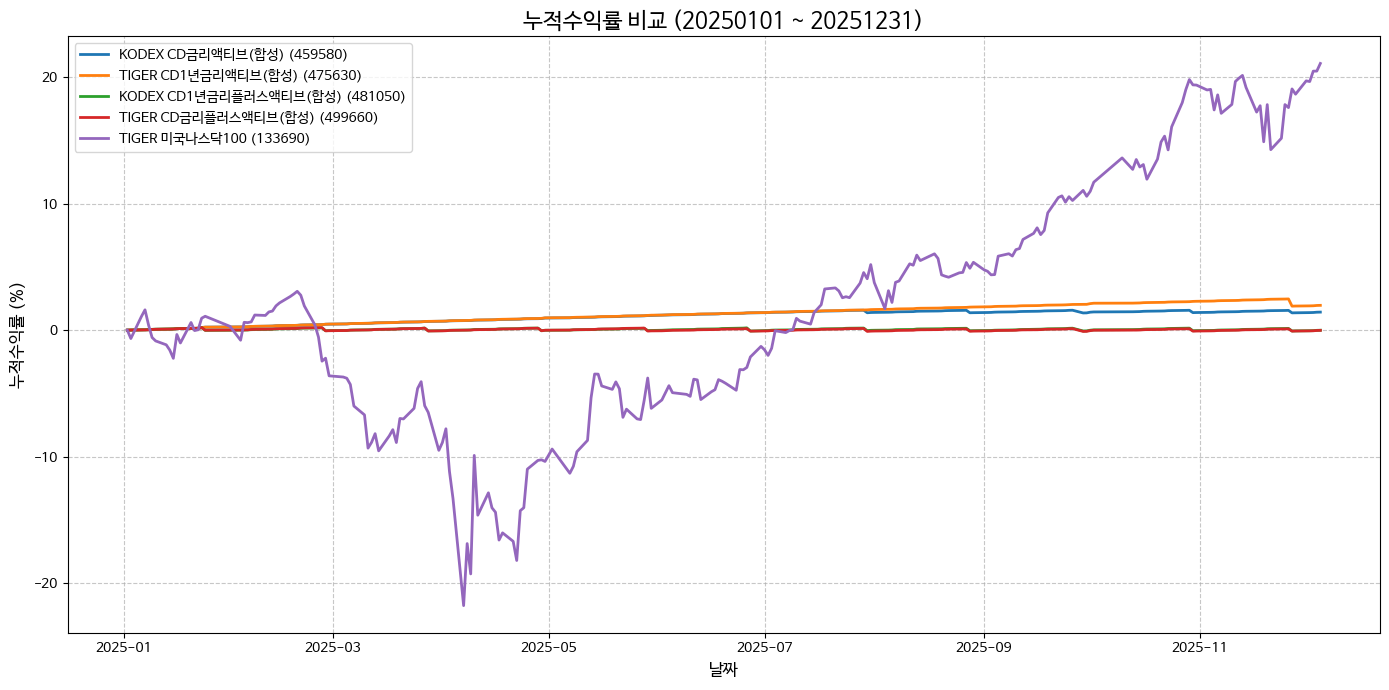

In [25]:
from pykrx import stock
from pykrx import bond
import pandas as pd
import matplotlib.pyplot as plt

start_date = "20250101"
end_date = "20251231"
#tickers = ["005930", "000660", "035420", "051910", "005380", "068270", "207940", "105560", "012330", "096770"]
etf_tickers = ["459580", "475630", "481050", "499660", "133690"]

plt.figure(figsize=(14, 7))

for etf_ticker in etf_tickers:
    etf_name = stock.get_etf_ticker_name(etf_ticker)
    df = stock.get_etf_ohlcv_by_date(start_date, end_date, etf_ticker)
    dpc = (df['시가'] - df['시가'].shift(1)) / df['시가'].shift(1) * 100 #dpc: daily percent change
    dpc.iloc[0] = 0
    cp = ((100 + dpc) / 100).cumprod() * 100 - 100 # 일간 변동률 누적곱 계산
    plt.plot(cp, linewidth=2, label=f"{etf_name} ({etf_ticker})")

plt.title(f"누적수익률 비교 ({start_date} ~ {end_date})", fontsize=16)
plt.xlabel("날짜", fontsize=12)
plt.ylabel("누적수익률 (%)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend()

plt.tight_layout()
plt.show()
